In [1]:
# Import the required libraries
import numpy as np  # NumPy is a library for numerical computations in Python
import pandas as pd  # Pandas is a library for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib is a library for creating data visualizations


In [2]:
# Read the dataset and create a DataFrame using pandas
winequality_red = pd.read_csv('datasets/winequality-red.csv')
winequality = pd.DataFrame(winequality_red)

In [3]:
# Check the dataset information and statistics
print("Dataset Information:")
print(winequality.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [4]:
print("Dataset Statistics:")
print(winequality.describe())

Dataset Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000          

In [5]:
winequality = winequality.drop(columns=['quality'])
print(winequality.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [6]:
# Reorder the columns to move 'pH' to the end
winequality = winequality[[col for col in winequality.columns if col != 'pH'] + ['pH']]

# Verify the new column order
print(winequality.columns)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol', 'pH'],
      dtype='object')


In [7]:
print("Dataset Information:")
print(winequality.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   sulphates             1599 non-null   float64
 9   alcohol               1599 non-null   float64
 10  pH                    1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB
None


In [8]:
# Function to handle missing values
def handle_missing_values(data):
    missing_values = data.isnull().sum()
    if missing_values.sum() == 0:
        print("No missing values in the dataset.")
    else:
        print("Missing Values:\n", missing_values)
        # Fill missing values with the mean of each column
        data.fillna(data.mean(), inplace=True)

In [9]:
# Function to scale numerical features (standardization)
def scale_numerical_features(data):
    numerical_features = data.drop(columns=['pH']).columns
    for feature in numerical_features:
        data[feature] = (data[feature] - data[feature].mean()) / data[feature].std()


In [10]:
# 1. Handle missing values
handle_missing_values(winequality)

# 2. Scale numerical features
scale_numerical_features(winequality)

No missing values in the dataset.


In [11]:
# If there are missing values, impute them with the mean
winequality.fillna(winequality.mean(), inplace=True)

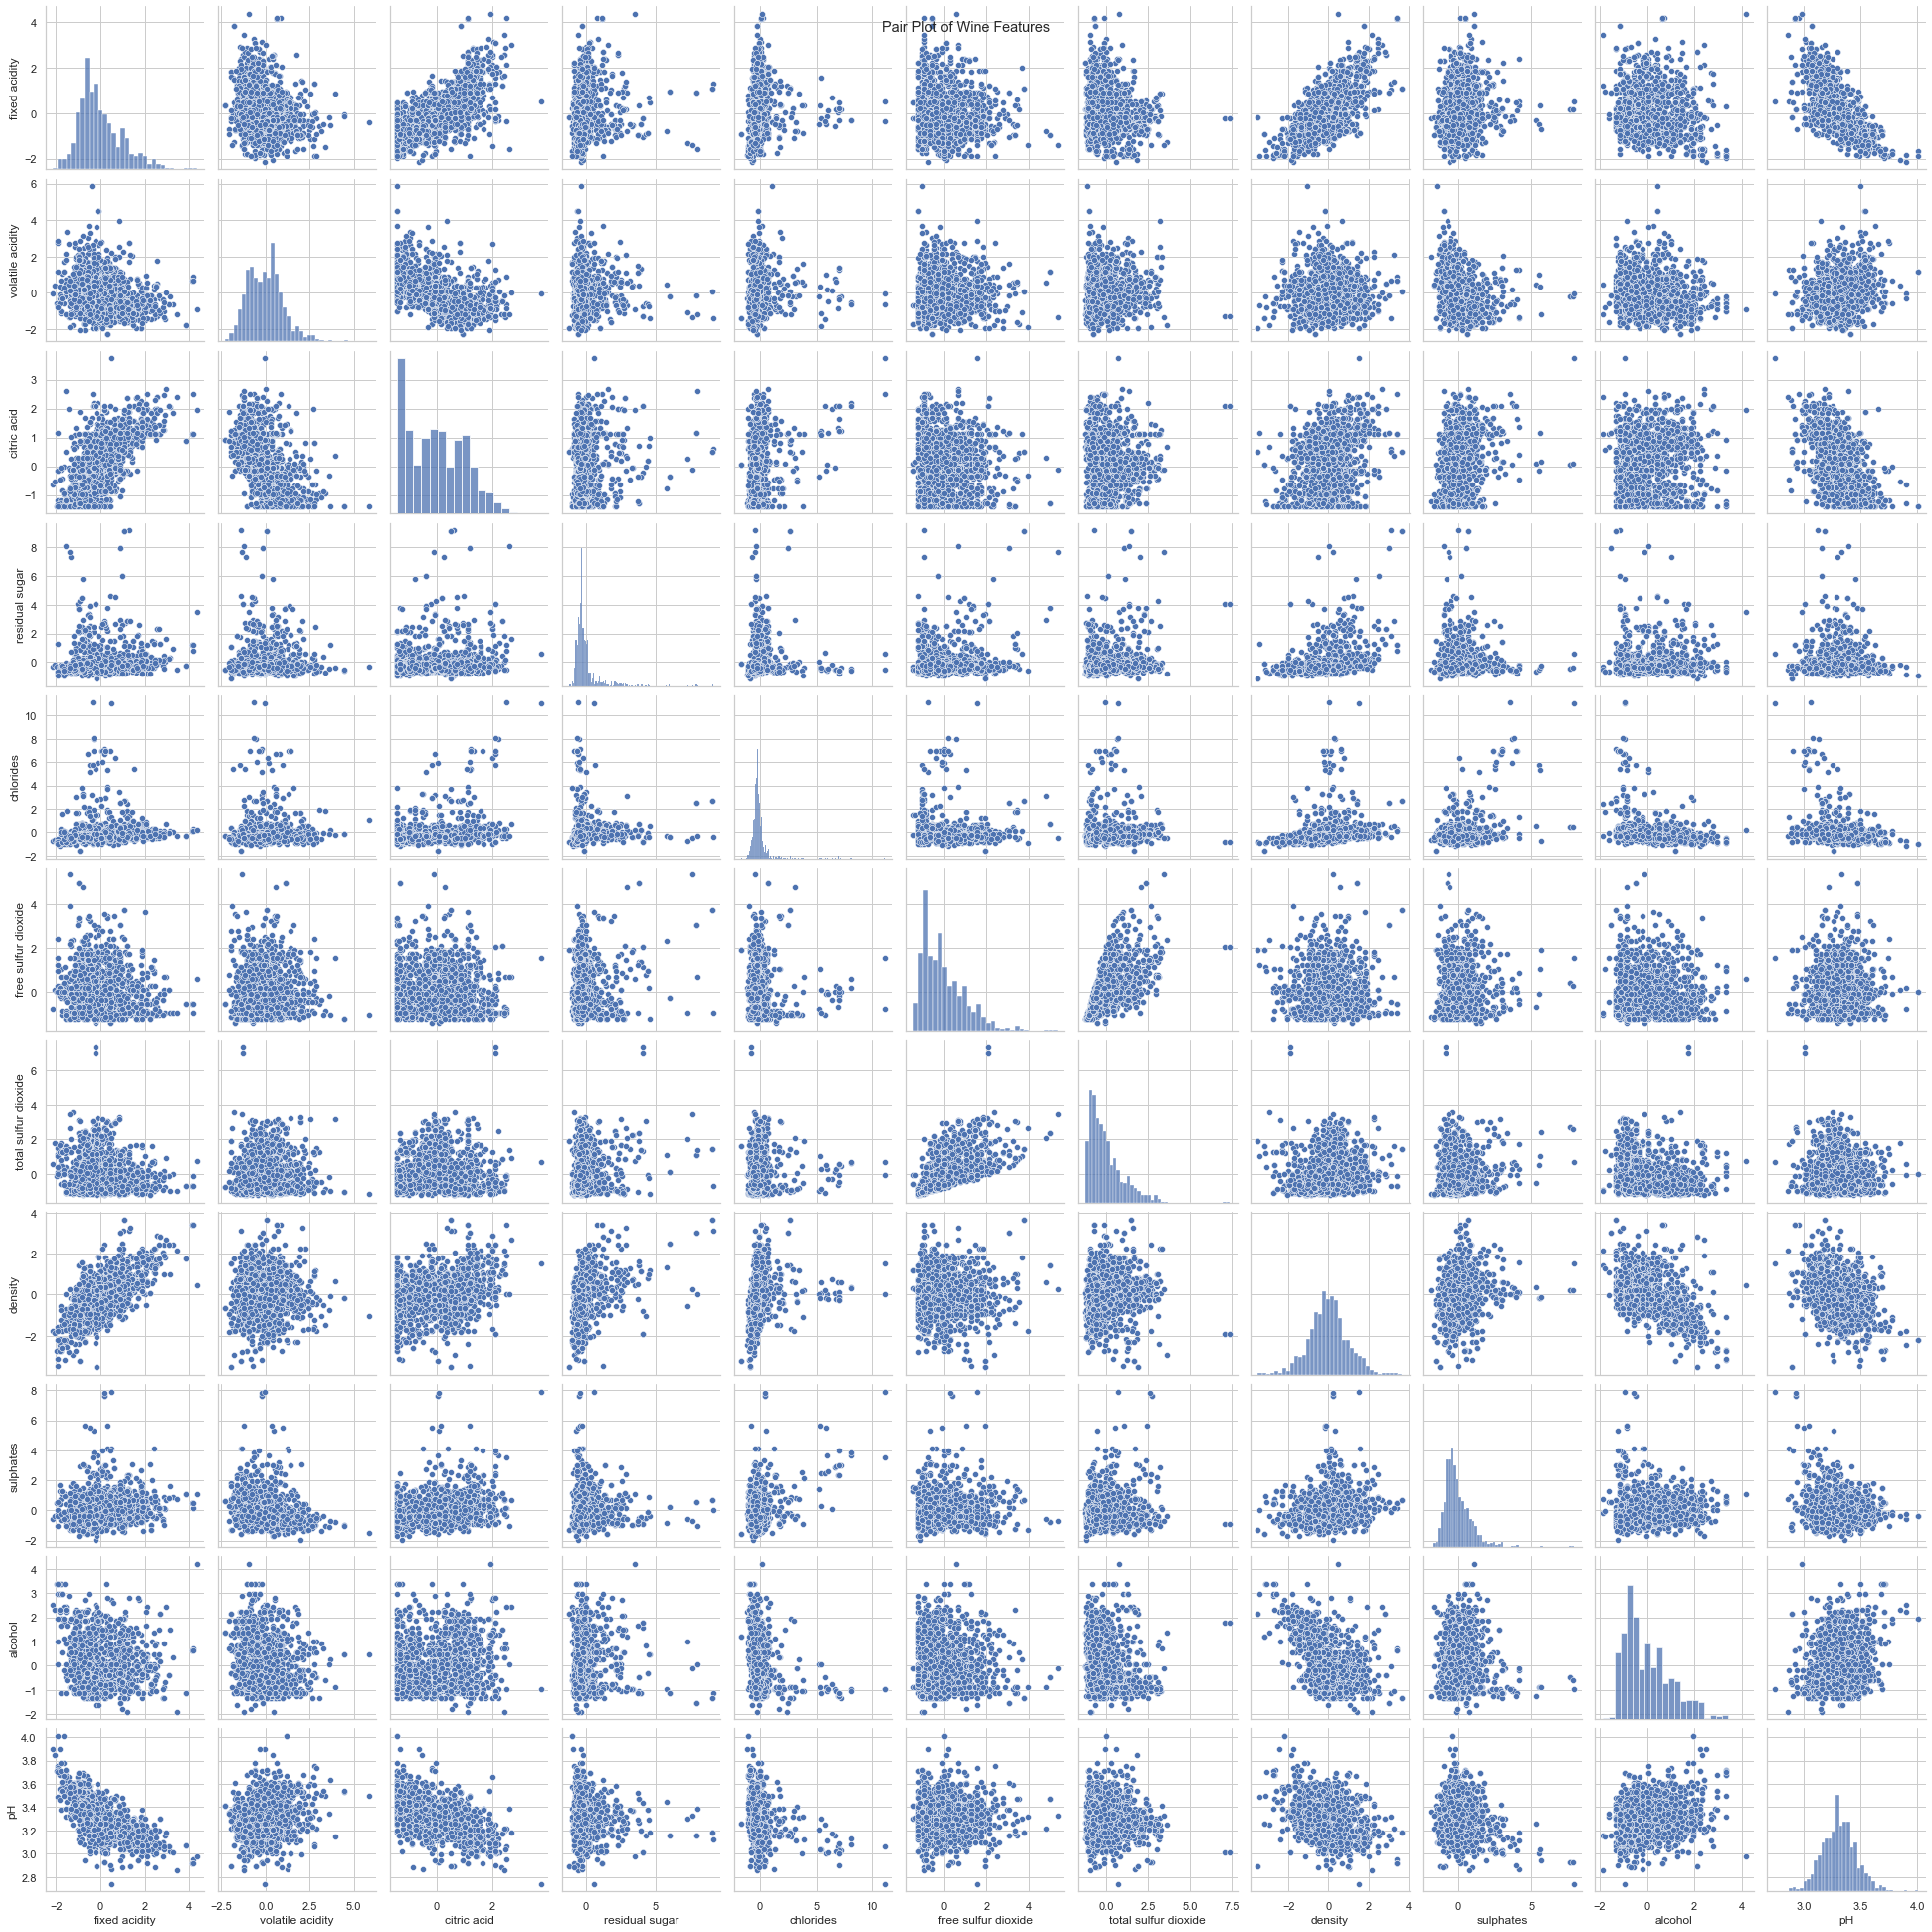

In [12]:
import seaborn as sns

# Set style for seaborn plots
sns.set(style="whitegrid")

# Create a pair plot to visualize the relationships between features
sns.pairplot(winequality, palette="viridis")
plt.suptitle("Pair Plot of Wine Features")
plt.show()


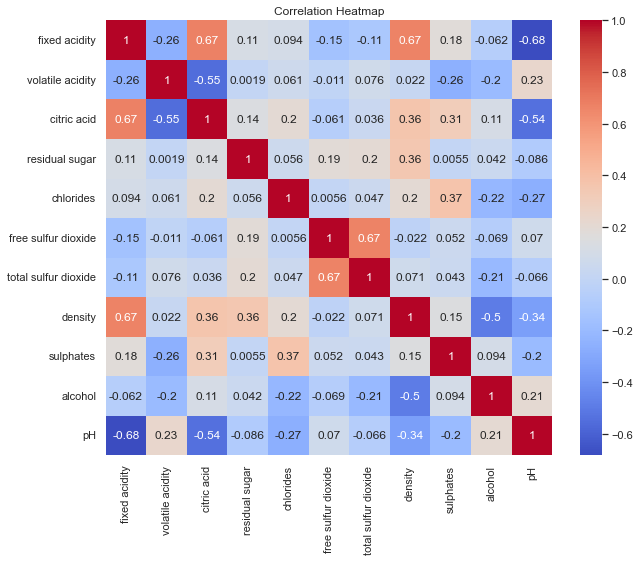

In [13]:
# Create a correlation matrix and heatmap to understand feature correlations
correlation_matrix = winequality.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

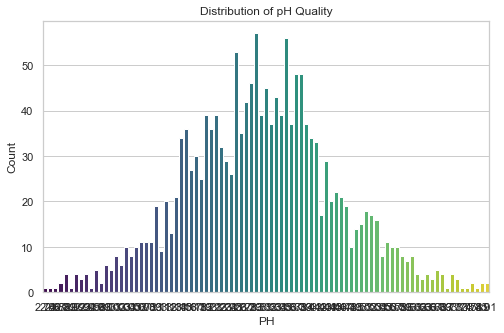

In [14]:
# Create bar plots to understand the distribution of wine quality
plt.figure(figsize=(8, 5))
sns.countplot(data=winequality, x="pH", palette="viridis")
plt.title("Distribution of pH Quality")
plt.xlabel("PH")
plt.ylabel("Count")
plt.show()



In [15]:
duplicates = winequality.duplicated()
duplicate_count = duplicates.sum()
print("Number of duplicate rows:", duplicate_count)


Number of duplicate rows: 240


In [16]:
winequality_no_duplicates = winequality.drop_duplicates()


In [17]:
duplicates_after_removal = winequality_no_duplicates.duplicated()
duplicate_count_after_removal = duplicates_after_removal.sum()
print("Number of duplicate rows after removal:", duplicate_count_after_removal)


Number of duplicate rows after removal: 0


In [18]:
winequality=winequality_no_duplicates

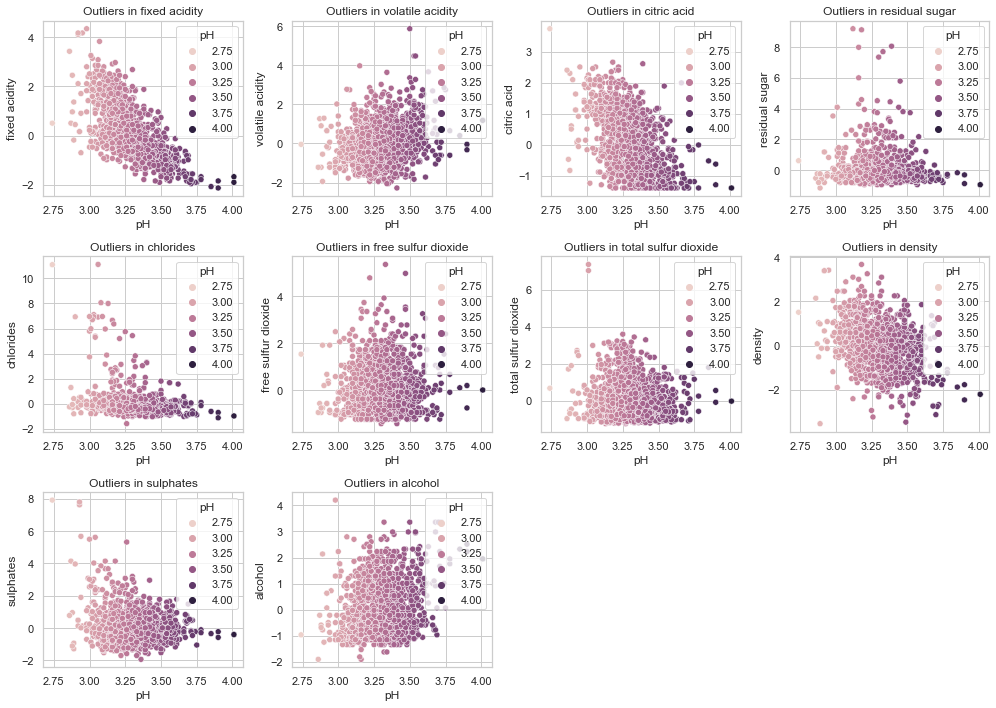

In [20]:
def visualize_outliers(data, columns):
    plt.figure(figsize=(14, 10))
    for i, column in enumerate(columns):
        plt.subplot(3, 4, i + 1)
        sns.scatterplot(data=data, x='pH', y=column, hue='pH')
        plt.title(f'Outliers in {column}')
    plt.tight_layout()
    plt.show()
    
# Define a function to remove outliers
def remove_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# List of columns to process for outliers (excluding 'pH')
columns_to_process = [col for col in winequality.columns if col != 'pH']

# Visualize outliers before removal
visualize_outliers(winequality, columns_to_process)


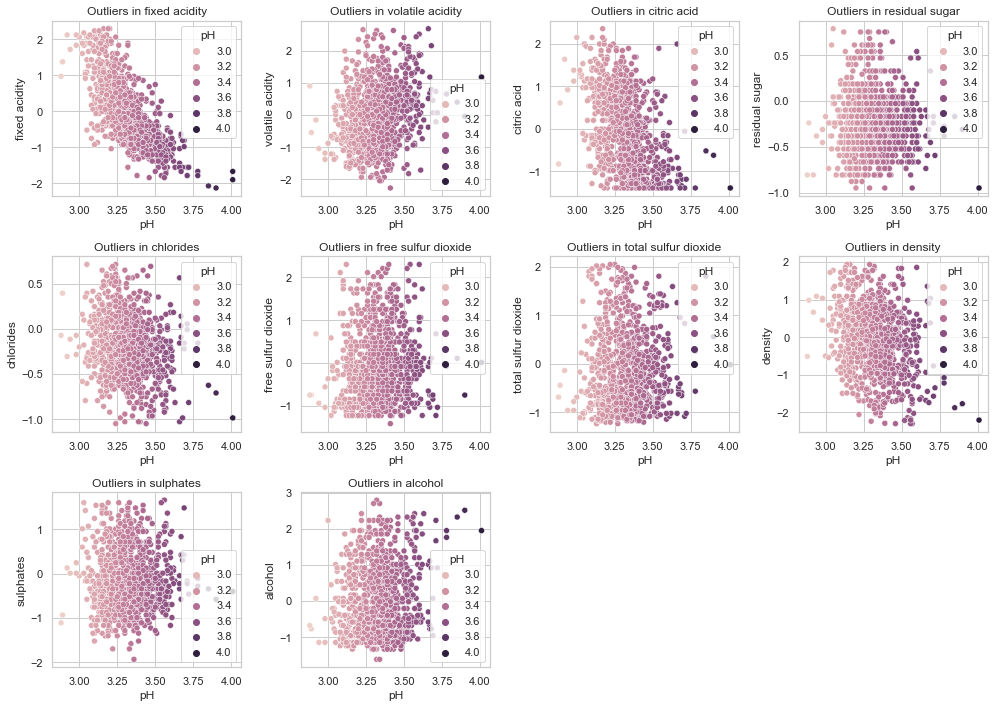

In [21]:

# Remove outliers
winequality_no_outliers = remove_outliers(winequality, columns_to_process)

# Visualize the data after removing outliers
visualize_outliers(winequality_no_outliers, columns_to_process)

winequality=winequality_no_outliers

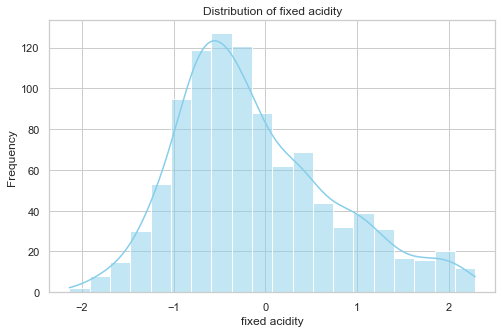

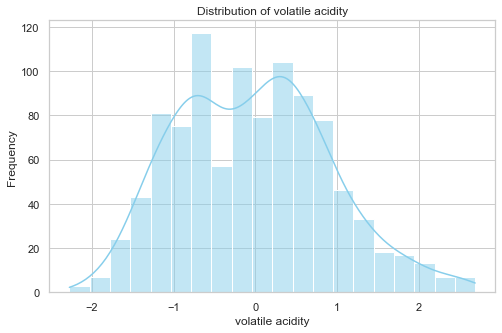

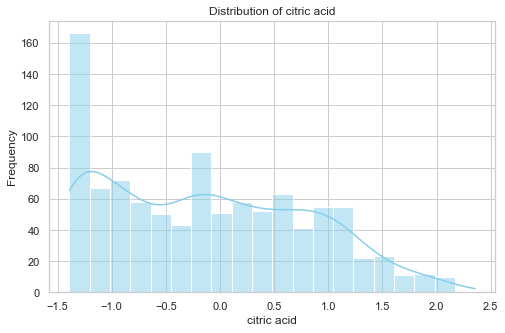

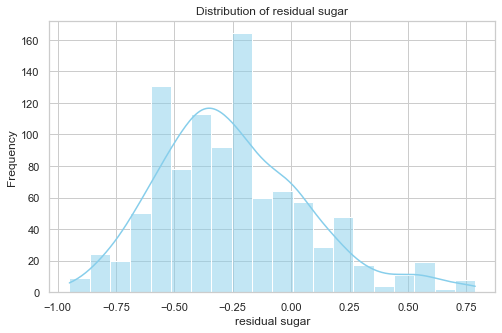

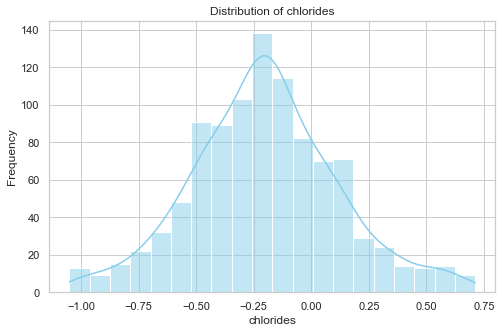

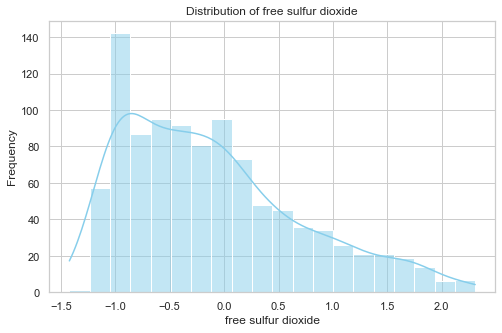

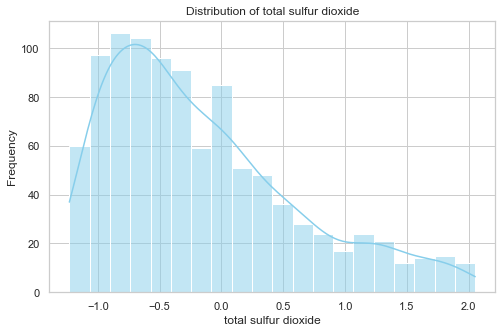

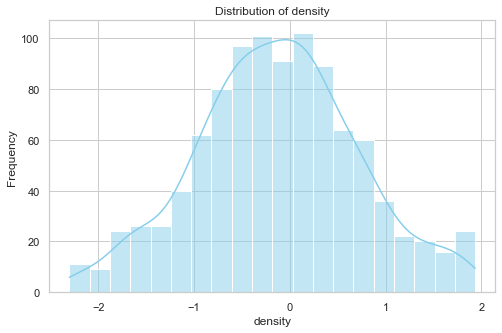

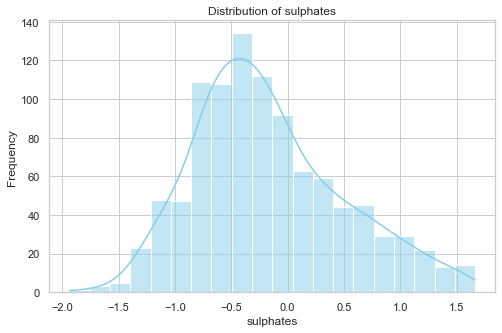

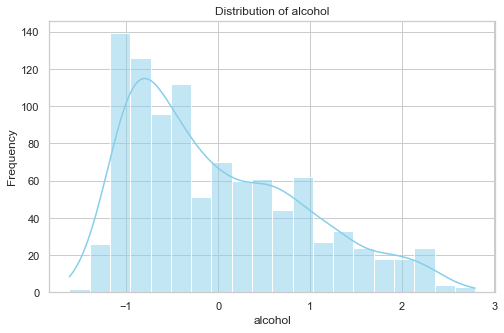

In [22]:
# Create histograms for individual features
for feature in winequality.columns[:-1]:  # Exclude the "pH" column
    plt.figure(figsize=(8, 5))
    sns.histplot(data=winequality[feature], kde=True, color="skyblue", bins=20)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

In [28]:
# Calculate the correlation between features and the target variable (wine quality)
correlations = winequality.corr()['pH'].drop('pH')  # Drop 'quality' itself
print(correlations)
# Select features with high correlation (e.g., absolute correlation > 0.1)
selected_features = correlations[abs(correlations) > 0.1].index
print(selected_features)
# Create a new DataFrame with the selected features and the target variable
winequality_selected = winequality[selected_features.append(pd.Index(['pH']))]
winequality = winequality_selected

fixed acidity          -0.712147
volatile acidity        0.248180
citric acid            -0.476811
residual sugar         -0.072108
chlorides              -0.197099
free sulfur dioxide     0.114338
total sulfur dioxide    0.030986
density                -0.275115
sulphates               0.009489
alcohol                 0.165759
Name: pH, dtype: float64
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'density', 'alcohol'],
      dtype='object')


In [29]:
# Select input features and target
X = winequality[selected_features].values
y = winequality['pH'].values

# Add a bias term to X
X = np.c_[np.ones(X.shape[0]), X]

# Normalize the features (optional but can help with convergence)
#X = (X - X.mean(axis=0)) / X.std(axis=0)

# Split the dataset into training and testing (80% training, 20% testing)
split_ratio = 0.8
split_index = int(X.shape[0] * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Print the shape of the data matrices
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 8)
y_train shape: (800,)
X_test shape: (200, 8)
y_test shape: (200,)


In [30]:
# User-defined functions for linear regression

def fit_linear_regression(X, y):
    # Calculate the weight vector using the closed-form solution
    X_transpose = X.T
    w = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
    return w

def predict(X, w):
    # Make predictions using the weight vector
    return X.dot(w)

def mean_squared_error(y_true, y_pred):
    # Calculate Mean Squared Error (MSE)
    return np.mean((y_true - y_pred) ** 2)

# Usage

# Assuming you have X_train, y_train, and X_test available

# Linear Regression
w_linear = fit_linear_regression(X_train, y_train)
y_pred_linear = predict(X_test, w_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("MSE with Linear Regression:", mse_linear)

# Linear Regression
w_linear = fit_linear_regression(X_train, y_train)
y_pred_linear = predict(X_test, w_linear)
mse_linear = mean_squared_error(y_train, predict(X_train, w_linear)) # Loss on training data
print("MSE for training data with Linear Regression:", mse_linear)
print("Final Weight Vector (Linear Regression):\n", w_linear)


MSE with Linear Regression: 0.00805907113206282
MSE for training data with Linear Regression: 0.006254966430206367
Final Weight Vector (Linear Regression):
 [ 3.31526625e+00 -1.77266984e-01 -2.60182098e-03 -3.42902013e-03
 -6.37966249e-02  2.92949004e-03  1.16016648e-01  6.70607983e-02]


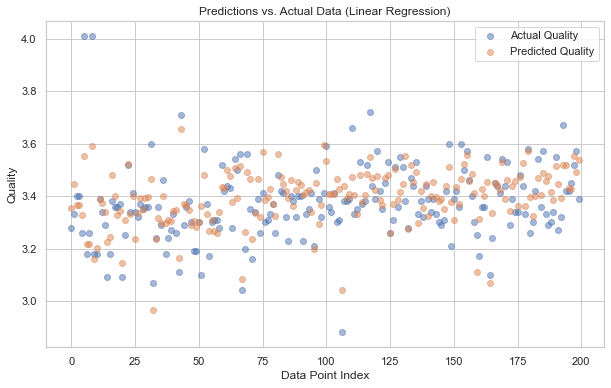

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(X_test)), y_test, alpha=0.5, label="Actual Quality")
plt.scatter(range(len(X_test)), y_pred_linear, alpha=0.5, label="Predicted Quality")
plt.xlabel("Data Point Index")
plt.ylabel("Quality")
plt.title("Predictions vs. Actual Data (Linear Regression)")


plt.legend()
plt.show()


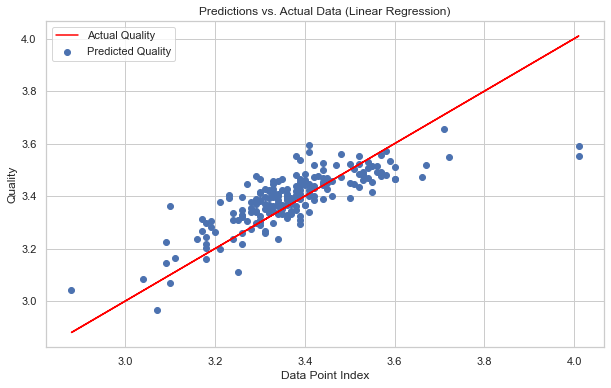

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_test, label="Actual Quality", color='red')
plt.scatter(y_test, y_pred_linear, label="Predicted Quality")

plt.xlabel("Data Point Index")
plt.ylabel("Quality")
plt.title("Predictions vs. Actual Data (Linear Regression)")


plt.legend()
plt.show()
